In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pyfftw
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation 
%matplotlib notebook

In [2]:
def Gaussian(z,z0,a,q0):
    return np.exp(-((z-z0)**2)/(2*a**2))*np.exp(1j*q0*z)

def Ev_momentum(k,t):
    m = 1
    Hk = k**2/(2*m)
    return np.exp(-1j*Hk*t/m)

In [3]:
def Ev_FieldG(in1,in2,dt):
    return np.cos(omega/2*dt)*in1-1j*np.sin(omega/2*dt)*in2

def Ev_FieldE(in1,in2,dt):
    return np.exp(-1j*0.0*dt)*np.cos(omega/2*dt)*in1-1j*np.sin(omega/2*dt)*in2

In [35]:
t0 = 0
tf = 10
Nt = 10000
omega = 1

delta = 0.0
t,dt = np.linspace(t0,tf,Nt,retstep=True)

cg = np.zeros((Nt)).astype(np.complex128)
ce = np.zeros((Nt)).astype(np.complex128)

cg[0] = 1.0+0.0j
ce[0] = 0

In [36]:
for i in range(1,Nt):
    tempg = Ev_FieldG(cg[i-1],ce[i-1],dt)
    tempe = Ev_FieldE(ce[i-1],cg[i-1],dt)
    cg[i] = tempg
    ce[i] = tempe

<IPython.core.display.Javascript object>


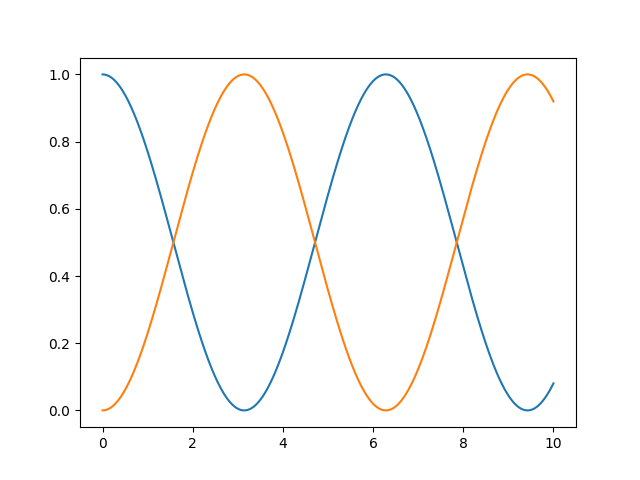

/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [37]:
fig = plt.figure()    
ax = fig.add_subplot(111)
ax.plot(t,cg*np.conjugate(cg))
ax.plot(t,ce*np.conjugate(ce))

In [56]:
N = 2**12
z,dz = np.linspace(-100,100,N,retstep=True)
z0 = 2.0
q0 = 0
a = 5
t0 = 0
tf = 10
Nt = 10000
omega = 1

delta = 0.0
t,dt = np.linspace(t0,tf,Nt,retstep=True)

cg = np.zeros((Nt,N)).astype(np.complex128)
ce = np.zeros((Nt,N)).astype(np.complex128)

cg[0] = Gaussian(z,z0,a,q0)
ce[0] = 0

dk = 2*np.pi/(N*dz);
k = np.linspace(-N/2,N/2,N)*dk
# a = pyfftw.empty_aligned(N, dtype='complex128')
# b = pyfftw.empty_aligned(N, dtype='complex128')
# fft_object = pyfftw.FFTW(a, b)

In [57]:
for i in range(1,Nt):
#     tempg = Ev_FieldG(cg[i-1],ce[i-1],dt)
#     tempe = Ev_FieldE(ce[i-1],cg[i-1],dt)
    
#     a[:] = cg[i-1]
    b = scp.fft.fft(cg[i-1])
    FFTWavePacketOrdered = scp.fft.fftshift(b)/(N)
    FutureFFTWavePacket = Ev_momentum(k,dt)*FFTWavePacketOrdered
    FutureFFTWavePacketO = scp.fft.fftshift(FutureFFTWavePacket)
    FutureIFFTWavePacket = scp.fft.ifft(FutureFFTWavePacketO)
    cg[i] = FutureIFFTWavePacket*N
    
    
#     a[:] = ce[i-1]
#     fft_object()
#     FFTWavePacketOrdered = scp.fft.fftshift(b)/(N)
#     FutureFFTWavePacket = Ev_momentum(k,dt)*FFTWavePacketOrdered
#     FutureIFFTWavePacket = scp.fft.ifft(FutureFFTWavePacket)  
#     ce[i] = FutureIFFTWavePacket

<IPython.core.display.Javascript object>


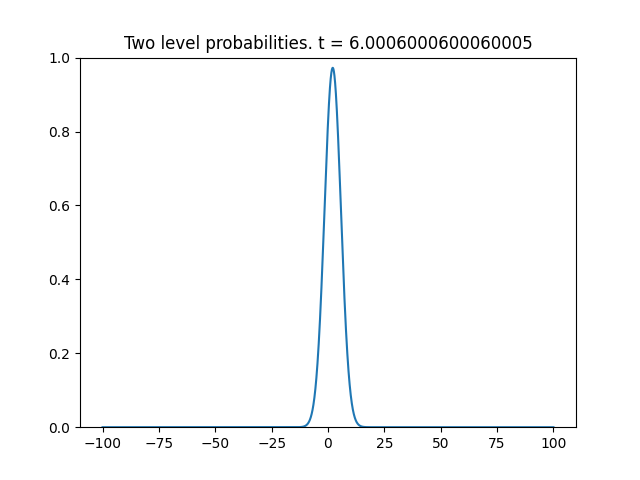

/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [62]:

fig = plt.figure()    
ax = fig.add_subplot(111)

def update(k):
    plt.cla()
    probG, = ax.plot(z,cg[k]*np.conjugate(cg[k]))
#     probE, = ax.plot(z,ce[k]*np.conjugate(ce[k]))
    ax.set_ylim(0,1)
    plt.title('Two level probabilities. t = '+str(t[k]))
#     probG.set_ydata(cg[k]*np.conjugate(cg[k]))
#     probE.set_ydata(ce[k]*np.conjugate(ce[k]))
    plt.show()

# anim = FuncAnimation(fig, update,
#                                frames=int((Nt-1)/15), interval=1, blit=True)
update(6000)
# anim.save('RWAGaussian.gif', writer='imagemagick')

In [114]:
cg

array([[ 7.22532028e-126-4.24280861e-126j,
         8.86100854e-126-5.80298349e-126j,
         1.08289458e-125-7.87309265e-126j, ...,
         2.84333612e-056+2.06722326e-056j,
         2.51572241e-056+1.64752077e-056j,
         2.21806469e-056+1.30247845e-056j],
       [-4.51028104e-017+3.46944695e-018j,
        -5.72458747e-017-8.67361738e-018j,
         6.93889390e-018-4.14165230e-017j, ...,
        -9.30245464e-017-9.40003284e-017j,
        -3.74591851e-017+3.91041230e-017j,
        -3.66189284e-017+5.20654212e-017j],
       [-7.97972799e-017+1.99493200e-017j,
         6.93889390e-017-3.38271078e-017j,
        -1.73472348e-017+1.92987987e-017j, ...,
         7.79541362e-017+1.58032631e-016j,
        -2.51263853e-017+4.34663427e-017j,
         4.30970364e-018-1.05194716e-016j],
       ...,
       [ 5.41997003e-014+2.53000745e-014j,
        -7.98458522e-014+4.77109671e-014j,
         3.42139511e-014+3.70840511e-015j, ...,
         2.81409282e-014+4.06741088e-014j,
        -1.43945728

<IPython.core.display.Javascript object>


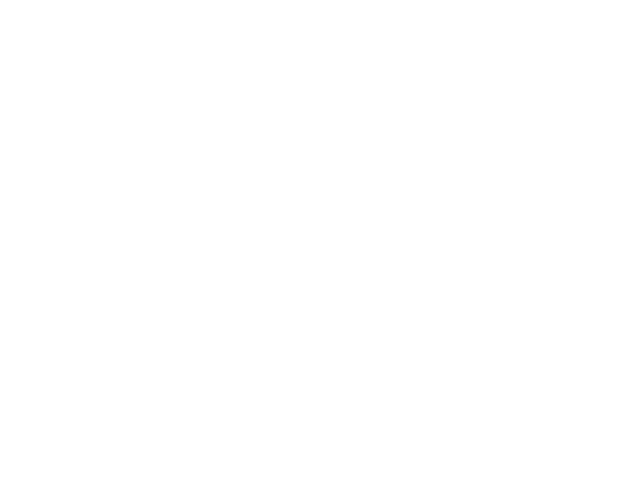

/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-74-a4fbc976b2b0>:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_acnhor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('RWAGaussian/RWAGaussian'+str(i)+'.png',bbox_acnhor='tight layout')
/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)

/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-74-a4fbc976b2b0>:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_acnhor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('RWAGaussian/RWAGaussian'+str(i)+'.png',bbox_acnhor='tight layout')
/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)

/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-74-a4fbc976b2b0>:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_acnhor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('RWAGaussian/RWAGaussian'+str(i)+'.png',bbox_acnhor='tight layout')
/media/rmhsik/Datos/Física/Master_NoCompartido/TFM/venv/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)

KeyboardInterrupt: 

In [74]:

fig = plt.figure()    
ax = fig.add_subplot(111)

def update(k,i):
    k*=15
    plt.cla()
    probG, = ax.plot(z,cg[k]*np.conjugate(cg[k]),label='Ground state')
    probE, = ax.plot(z,ce[k]*np.conjugate(ce[k]),label='Excited state')
    ax.legend(loc='upper left')
    ax.set_ylim(0,1)
    ax.set_xlabel('Distance z (a.u.)')
    ax.set_ylabel('Probability')
    plt.title('Two level probabilities. t = '+str(round(t[k],2)))
#     probG.set_ydata(cg[k]*np.conjugate(cg[k]))
#     probE.set_ydata(ce[k]*np.conjugate(ce[k]))
    plt.savefig('RWAGaussian/RWAGaussian'+str(i)+'.png',bbox_acnhor='tight layout')

for i in range(int(Nt/15)):
    update(i,i)
